In [91]:
import pandas as pd

In [18]:
#merging 12 months sales data into a single csv file
from google.colab import files
uploaded = files.upload()

Saving Sales_September_2019.csv to Sales_September_2019.csv


In [34]:
df1 = pd.read_csv("/content/Sales_January_2019.csv")

In [35]:
# List to store the dataframes
dataframes = []
# Read each CSV file and append its data to the list
dataframes.append(df1)

In [36]:
df2 = pd.read_csv("/content/Sales_February_2019.csv")
dataframes.append(df2)

In [37]:
df3 = pd.read_csv("/content/Sales_March_2019.csv")
dataframes.append(df3)

In [38]:
df4 = pd.read_csv("/content/Sales_April_2019.csv")
dataframes.append(df4)

In [39]:
df5 = pd.read_csv("/content/Sales_May_2019.csv")
dataframes.append(df5)

In [40]:
df6 = pd.read_csv("/content/Sales_June_2019.csv")
dataframes.append(df6)

In [41]:
df7 = pd.read_csv("/content/Sales_July_2019.csv")
dataframes.append(df7)

In [42]:
df8 = pd.read_csv("/content/Sales_August_2019.csv")
dataframes.append(df8)

In [92]:
path = "/content/Sales_September_2019.csv"
df9 = pd.read_csv(path)
df9.head()
dataframes.append(df9)

In [44]:
df10 = pd.read_csv("/content/Sales_October_2019.csv")
dataframes.append(df10)

In [45]:
df11 = pd.read_csv("/content/Sales_November_2019.csv")
dataframes.append(df11)

In [46]:
df12 = pd.read_csv("/content/Sales_December_2019.csv")
dataframes.append(df12)

In [47]:
# Merge the dataframes into a single dataframe
merged_dataframe = pd.concat(dataframes, ignore_index=True)

In [48]:
# Export the merged dataframe to a CSV file
merged_dataframe.to_csv('merged_data.csv', index=False)

# Download the CSV file
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
path_rel = "/content/merged_data.csv"
data = pd.read_csv(path_rel)

In [53]:
data.shape

(186850, 6)

In [58]:
pd.options.display.max_rows = 186850
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [86]:
data.dropna(how = "all",inplace = True)

In [79]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')

In [80]:
cols = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month']

In [ ]:
for col in cols:
  print(f"{col} : {data[col].isna().sum()}")

In [59]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [89]:
#Add month column
data['Month'] = data["Order Date"].str[:2]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [87]:
data["Month"].unique()

array(['01', 'Or', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12'], dtype=object)

In [88]:
data = data[data["Month"] != "Or"]
data["Month"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [90]:
data["Month"] = data["Month"].astype("int32")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [93]:
#converting columns to correct dtypes(str->int32, float32)
data['Quantity Ordered'] = pd.to_numeric(data["Quantity Ordered"])
data['Price Each'] = pd.to_numeric(data["Price Each"])

In [95]:
#add sales column
data["Sales"] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [97]:
#which was the best month for sales
#sales by month -> highest for Dec and least for Jan
results = data.groupby("Month")["Sales"].sum()
results

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

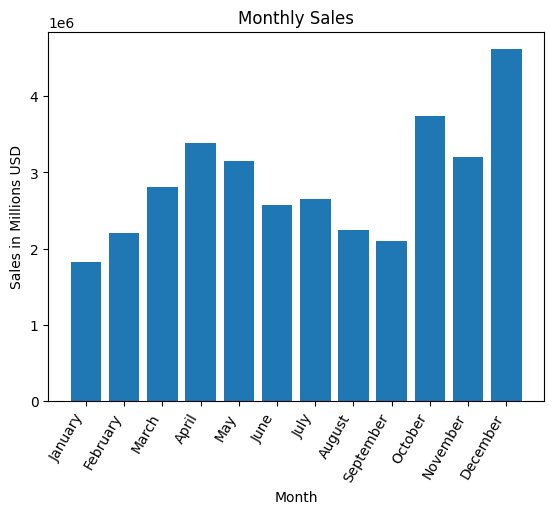

In [109]:
import matplotlib.pyplot as plt
import calendar
%matplotlib inline
months = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.bar(months, results[months])
plt.ylabel("Sales in Millions USD")
plt.xticks( months, [calendar.month_name[i] for i in months],rotation = 60,ha = "right")
plt.xlabel("Month")
plt.title("Monthly Sales")
plt.show()

In [136]:
#which US City has the highest sales
def get_city(address):
  return address.split(",")[1]
#data["City"] = data["Purchase Address"].apply(lambda x: x.split(",")[1])
data["City"] = data["Purchase Address"].apply(lambda x: get_city(x))
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX


In [162]:
cities = sorted(data["City"].unique())
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

In [163]:
#to avoid duplicates
def get_state(address):
  return address.split(",")[2][1:3]
data["State"] = data["Purchase Address"].apply(lambda x: get_state(x))

In [164]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX


In [174]:
sales_by_city = data.groupby("City")["Sales"].sum()
sales_by_city

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

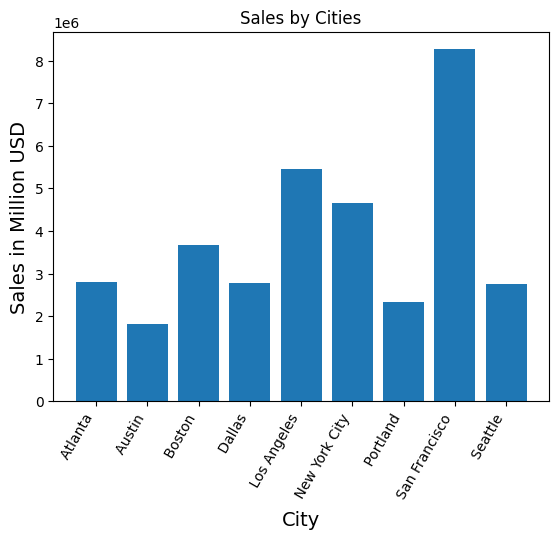

In [166]:
plt.bar(cities,sales_by_city["Sales"])
plt.xticks(cities,rotation = 60, ha = "right")
plt.xlabel("City", fontsize = 14)
plt.ylabel("Sales in Million USD",fontsize = 14)
plt.title("Sales by Cities")
plt.show()


#san francisco -> highest sales

In [171]:
#what time should advt. be displayed in order to maximize the likelihood of customers buying
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [173]:
data["Hour"] = data["Order Date"].dt.hour
data["Minute"] = data["Order Date"].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,11,59


In [176]:
#for sales by hours of the day(time at which ordered)
sales_by_hours = data.groupby("Hour")["Sales"].sum()
sales_by_hours

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

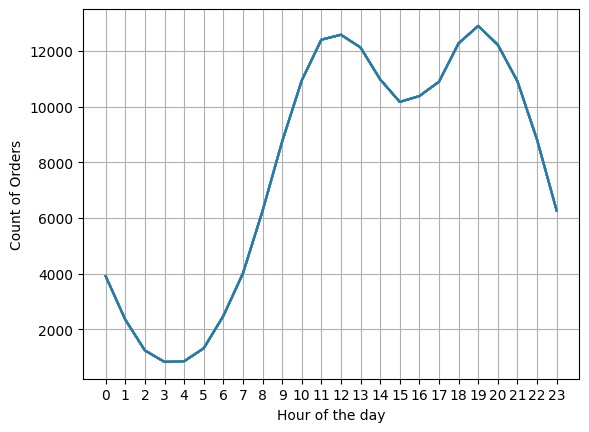

In [187]:
hours = [hour for hour, df in data.groupby("Hour")]
plt.plot(hours, data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour of the day")
plt.ylabel("Count of Orders")
plt.show()

#right time to display ads is -> around 7PM and 12AM

In [192]:
#Most ofter ordered as a combination of products
#same order ID shows same time of ordering by same customer

new_data = data[data["Order ID"].duplicated(keep=False)]
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,TX,16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,TX,16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,CA,8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,CA,8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,NY,11,19


In [ ]:
new_data["Grouped Products"] = new_data.groupby("Order ID")["Product"].transform(lambda x : ','.join(x))
new_data.head()

In [199]:
new_data.drop_duplicates(subset='Grouped Products', inplace=True)
new_data.drop("Product", axis = 1, inplace = True)
new_data.head()

<ipython-input-199-f473fe3c4443>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop_duplicates(subset='Grouped Products', inplace=True)
<ipython-input-199-f473fe3c4443>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop("Product", axis = 1, inplace = True)


,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Grouped Products
41,141275,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,TX,16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,CA,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,NY,11,19,"Vareebadd Phone,Wired Headphones"
153,141384,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston,MA,0,14,"Google Phone,USB-C Charging Cable"
220,141450,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco,CA,11,16,"Google Phone,Bose SoundSport Headphones"


In [202]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in new_data["Grouped Products"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key, value)

('Google Phone', 'USB-C Charging Cable') 21
('iPhone', 'Lightning Charging Cable') 19
('Google Phone', 'Wired Headphones') 14
('USB-C Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones') 8
('iPhone', 'Wired Headphones') 8
('Vareebadd Phone', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones') 7
('Lightning Charging Cable', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable') 6


In [242]:
products = data["Product"].unique()

In [250]:
#which products sold most and why?
res = data.groupby("Product")["Quantity Ordered"].sum()[products]
res

Product
iPhone                         6849
Lightning Charging Cable      23217
Wired Headphones              20557
27in FHD Monitor               7550
AAA Batteries (4-pack)        31017
27in 4K Gaming Monitor         6244
USB-C Charging Cable          23975
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Vareebadd Phone                2068
AA Batteries (4-pack)         27635
Google Phone                   5532
20in Monitor                   4129
34in Ultrawide Monitor         6199
ThinkPad Laptop                4130
LG Dryer                        646
LG Washing Machine              666
Name: Quantity Ordered, dtype: int64

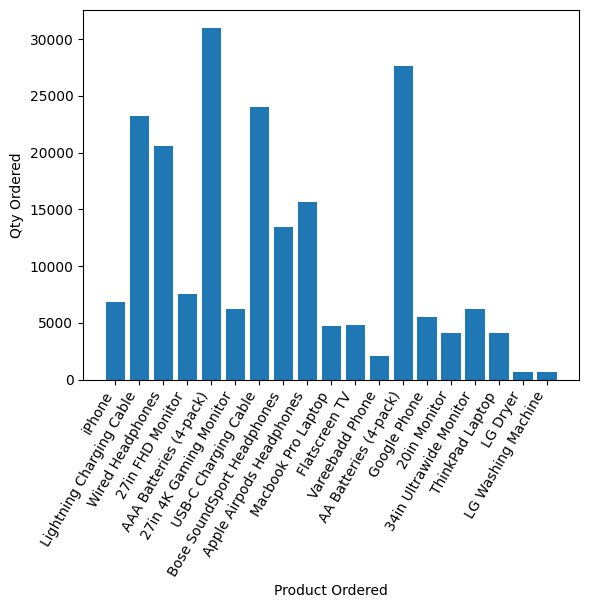

In [249]:
plt.bar(products, res)
plt.xticks(products, rotation = 60, ha = "right")
plt.xlabel("Product Ordered")
plt.ylabel("Qty Ordered")
plt.show()

In [251]:
price_prod = data.groupby("Product").mean()["Price Each"]
print(price_prod)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-251-e5d2a7360d7d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_prod = data.groupby("Product").mean()["Price Each"]


<ipython-input-261-43c19ae5cfe9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 60, ha = "right")


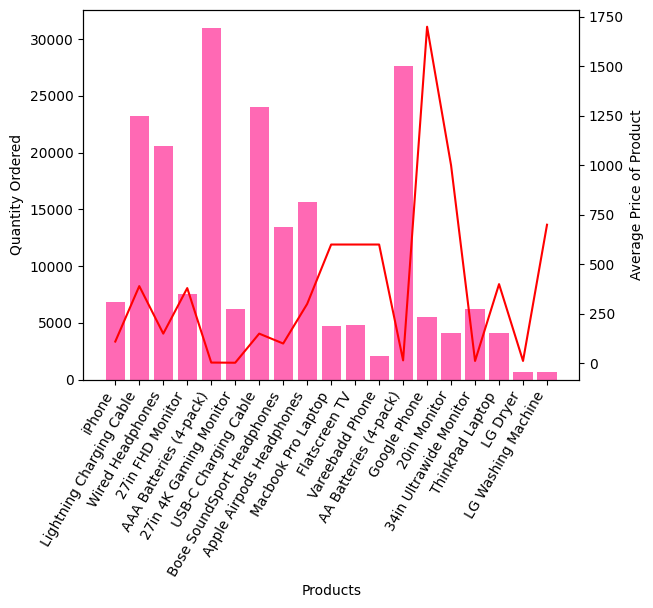

In [261]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, res, color = "hotpink")
ax2.plot(products, price_prod, color = "red")
ax1.set_xlabel("Products")
ax1.set_xticklabels(products, rotation = 60, ha = "right")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Average Price of Product")
#plt.legend(loc = "best")
plt.show()